## Regression Models with Random Forest

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

### Load the data set

In [2]:
df = pd.read_csv('P53_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

### Input features

In [3]:
x = df.drop('pIC50', axis=1)
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1147,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1148,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1149,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [4]:
Y = df.pIC50
Y

0       4.568636
1       4.180456
2       4.045757
3       4.070581
4       4.036212
          ...   
1146    8.045757
1147    8.920819
1148    8.795880
1149    9.455932
1150    6.585027
Name: pIC50, Length: 1151, dtype: float64

### Let's examine the data dimension

In [5]:
x.shape

(1151, 881)

In [6]:
Y.shape

(1151,)

### Remove low variance features

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(x)

In [9]:
X.shape

(1151, 162)

### Data split (80/20 ratio)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
X_train.shape, Y_train.shape

((920, 162), (920,))

In [12]:
X_test.shape, Y_test.shape

((231, 162), (231,))

### Building a Regression Model using Random Forest

In [13]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.8695006187598074

In [14]:
Y_pred = model.predict(X_test)

### Scatter Plot of Experimental vs Predicted pIC50 Values

/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

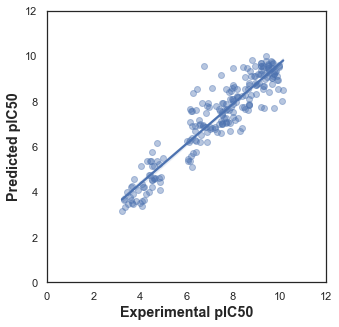

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

### Linear Regression Model

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Predicts the X_train

In [18]:
Y_pred_train = model.predict(X_train)

In [19]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_train, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_train, Y_pred_train))

Coefficients: [ 3.19618528e-01 -5.62947973e-02  4.95251484e-01 -6.92356053e-02
  2.44456423e-01  1.54691392e+00 -3.16459303e-03  4.27820285e-01
 -2.10451227e-01 -1.40344733e-01  1.04699610e-01 -2.29077822e+00
  1.40792325e+00  1.78790284e+00 -1.40581789e-01  7.62059677e-01
 -1.80571366e-01  3.84296607e-01  1.69093265e-01 -2.62620131e-01
  1.63883439e-01 -3.36349563e-01  6.82296537e-02  2.64084440e-01
  2.44456423e-01 -1.06554196e+00 -3.16459303e-03 -1.06696416e+00
 -3.25213428e-01  1.16818465e+00  7.71861487e-01  5.92166322e-02
 -3.16459303e-03  2.16882078e-01  6.83544241e-01 -2.03283846e+00
  1.79099349e+00 -3.97385929e-01 -1.46807062e-02 -4.32409585e-01
  7.27219487e-03 -8.03318779e-01  5.74845355e-01  1.08964970e+00
  1.49711255e+00 -1.22637136e+00 -1.45283839e-01  1.54977934e-01
  6.06416102e-02 -2.71062616e-01 -1.70985051e+00 -1.42670792e+00
 -2.96495712e-01  1.31467642e+00 -3.30225510e+00  1.30188121e+00
  2.18467875e+00  1.33758302e-01  1.18204282e+00 -1.54421022e+00
  1.7272977

### Predicts the X_test

In [20]:
Y_pred_test = model.predict(X_test)

In [21]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_test))

Coefficients: [ 3.19618528e-01 -5.62947973e-02  4.95251484e-01 -6.92356053e-02
  2.44456423e-01  1.54691392e+00 -3.16459303e-03  4.27820285e-01
 -2.10451227e-01 -1.40344733e-01  1.04699610e-01 -2.29077822e+00
  1.40792325e+00  1.78790284e+00 -1.40581789e-01  7.62059677e-01
 -1.80571366e-01  3.84296607e-01  1.69093265e-01 -2.62620131e-01
  1.63883439e-01 -3.36349563e-01  6.82296537e-02  2.64084440e-01
  2.44456423e-01 -1.06554196e+00 -3.16459303e-03 -1.06696416e+00
 -3.25213428e-01  1.16818465e+00  7.71861487e-01  5.92166322e-02
 -3.16459303e-03  2.16882078e-01  6.83544241e-01 -2.03283846e+00
  1.79099349e+00 -3.97385929e-01 -1.46807062e-02 -4.32409585e-01
  7.27219487e-03 -8.03318779e-01  5.74845355e-01  1.08964970e+00
  1.49711255e+00 -1.22637136e+00 -1.45283839e-01  1.54977934e-01
  6.06416102e-02 -2.71062616e-01 -1.70985051e+00 -1.42670792e+00
 -2.96495712e-01  1.31467642e+00 -3.30225510e+00  1.30188121e+00
  2.18467875e+00  1.33758302e-01  1.18204282e+00 -1.54421022e+00
  1.7272977